In [130]:
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f', 'beta']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [131]:
def rho_free(x,xp,beta):
    return (np.exp((-(x-xp)**2)/(2.0*beta)))/np.sqrt(2.0*np.pi*beta)
def rho_harmonic_trotter(grid,beta):
    return np.array([[rho_free(x,xp,beta)*np.exp(-0.5*beta*0.5*(x**2+xp**2)) for x in grid] for xp in grid])

x_max=5.0
nx=100
dx=2.0*x_max/(nx-1)
x= [i*dx for i in range(-(nx-1)/2,nx/2+1)]
beta_tmp=2.0**(-5)
beta=2.0**2
rho=rho_harmonic_trotter(x,beta_tmp)
while beta_tmp < beta:
    rho = np.dot(rho,rho)
    rho *=dx
    beta_tmp *=2.0
    print "beta: %s -> %s" % (beta_tmp/2.0,beta_tmp)

beta: 0.03125 -> 0.0625
beta: 0.0625 -> 0.125
beta: 0.125 -> 0.25
beta: 0.25 -> 0.5
beta: 0.5 -> 1.0
beta: 1.0 -> 2.0
beta: 2.0 -> 4.0


In [132]:
z=np.sum(rho[i,i] for i in range(0,nx+1))*dx
pi_of_x=[rho[j,j]/z for j in range(0,nx+1)]
f=open("data_harm_matrixsquaring_beta"+str(beta)+".dat","w")
for j in range(nx+1):
    f.write(str(x[j])+" "+str(rho[j,j]/z)+"\n")
f.close()

def piquan(beta):
    x=np.linspace(-6,6,500)
    y=np.sqrt(np.tanh(beta/2.0)/np.pi)*np.exp(-x*x*np.tanh(beta/2.0))
    ejes=[x,y]
    return ejes

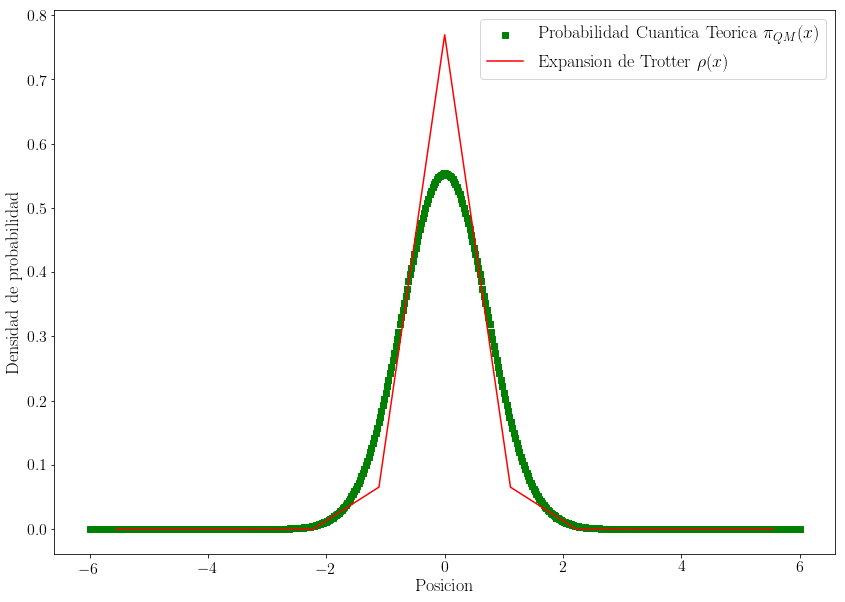

In [40]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
matplotlib.rcParams['figure.figsize'] = [14, 10]
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16)
plt.xlabel("Posicion",fontsize=18)
plt.ylabel("Densidad de probabilidad",fontsize=18)
plt.plot(piquan(4)[0],piquan(4)[1],"gs",label=r"Probabilidad Cuantica Teorica $\pi_{QM}(x)$")
plt.plot(x,pi_of_x,"r",label=r"Expansion de Trotter $\rho(x)$")
plt.legend(fontsize=18)

## Limite de alta temperatura para $\pi_{QM}(x)$

Podemos ver el límite de alta temperatura de la densidad de probabilidad cuántica dada por la expresión:
<n>
$\pi_{QM}(x)=\sqrt{\frac{\tanh\left(\frac{\beta}{2}\right)}{\pi}}e^{-x^2\tanh\left(\frac{\beta}{2}\right)}$.
<n>
En el caso de alta temperatura $T\to\infty$ por tanto $\beta=\frac{1}{T}\to0$, veamos entonces que forma toma la expresión $\tanh\left(\frac{\beta}{2}\right)$ <b>a primer orden</b> en $\beta$:
<n>
$\tanh\left(\frac{\beta}{2}\right)=\frac{\sinh\left(\frac{\beta}{2}\right)}{\cosh\left(\frac{\beta}{2}\right)}=\frac{e^{\beta/2}-e^{-\beta/2}}{e^{\beta/2}+e^{-\beta/2}}\approx \frac{(1+\beta/2)-(1-\beta/2)}{(1+\beta/2)+(1-\beta/2)}=\frac{\beta}{2}$.
<n>
Así $$\lim_{\beta \to 0}\pi_{QM}(x)=\sqrt{\frac{\beta}{2\pi}}e^{-\frac{\beta}{2}x^2}=\pi_{class}(x)$$, y esta expresión es exactamente la expresión para la densidad de probabilidad clásica.

## Variación parámetros Matrix Squaring

### Inicio con temperaturas bajas

En este caso vamos a tomar diferentes valores para la temperatura inicial, en concreto $\beta_0=2^{-2},2^{-1},2^{0},2^{1},2^{2}$ y una temperartura final $\beta_f=2^{5}$



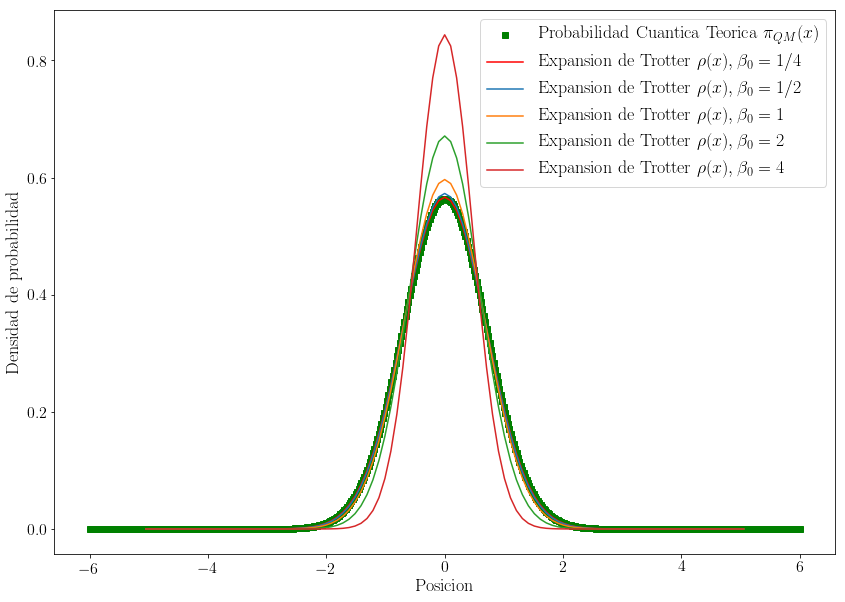

In [34]:
def piquan(beta):
    x=np.linspace(-6,6,500)
    y=np.sqrt(np.tanh(beta/2.0)/np.pi)*np.exp(-x*x*np.tanh(beta/2.0))
    ejes=[x,y]
    return ejes
def rho_free(x,xp,beta):
    return (np.exp((-(x-xp)**2)/(2.0*beta)))/np.sqrt(2.0*np.pi*beta)
def rho_harmonic_trotter(grid,beta):
    return np.array([[rho_free(x,xp,beta)*np.exp(-0.5*beta*0.5*(x**2+xp**2)) for x in grid] for xp in grid])

x_max=5.0
nx=100
dx=2.0*x_max/(nx-1)
x= [i*dx for i in range(-(nx-1)/2,nx/2+1)]

# BETA INICIAL=1/4

beta_tmp=2.0**(-2)
beta=2.0**5
rho_1=rho_harmonic_trotter(x,beta_tmp)
while beta_tmp < beta:
    rho_1= np.dot(rho_1,rho_1)
    rho_1*=dx
    beta_tmp *=2.0
   
    
z=np.sum(rho_1[i,i] for i in range(0,nx+1))*dx
pi_of_x_1=[rho_1[j,j]/z for j in range(0,nx+1)]

# BETA INICIAL=1/2

beta_tmp=2.0**(-1)
beta=2.0**5
rho_2=rho_harmonic_trotter(x,beta_tmp)
while beta_tmp < beta:
    rho_2= np.dot(rho_2,rho_2)
    rho_2*=dx
    beta_tmp *=2.0
   
    
z=np.sum(rho_2[i,i] for i in range(0,nx+1))*dx
pi_of_x_2=[rho_2[j,j]/z for j in range(0,nx+1)]


# BETA INICIAL=1

beta_tmp=2.0**(0)
beta=2.0**5
rho_3=rho_harmonic_trotter(x,beta_tmp)
while beta_tmp < beta:
    rho_3= np.dot(rho_3,rho_3)
    rho_3*=dx
    beta_tmp *=2.0
    
    
z=np.sum(rho_3[i,i] for i in range(0,nx+1))*dx
pi_of_x_3=[rho_3[j,j]/z for j in range(0,nx+1)]

# BETA INICIAL=2

beta_tmp=2.0**(1)
beta=2.0**5
rho_4=rho_harmonic_trotter(x,beta_tmp)
while beta_tmp < beta:
    rho_4= np.dot(rho_4,rho_4)
    rho_4*=dx
    beta_tmp *=2.0
  
    
z=np.sum(rho_4[i,i] for i in range(0,nx+1))*dx
pi_of_x_4=[rho_4[j,j]/z for j in range(0,nx+1)]


# BETA INICIAL=4

beta_tmp=2.0**(2)
beta=2.0**5
rho_5=rho_harmonic_trotter(x,beta_tmp)
while beta_tmp < beta:
    rho_5= np.dot(rho_5,rho_5)
    rho_5*=dx
    beta_tmp *=2.0

    
z=np.sum(rho_5[i,i] for i in range(0,nx+1))*dx
pi_of_x_5=[rho_5[j,j]/z for j in range(0,nx+1)]



plt.rc('text', usetex=True)
plt.rc('font', family='serif')
matplotlib.rcParams['figure.figsize'] = [14, 10]
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16)
plt.xlabel("Posicion",fontsize=18)
plt.ylabel("Densidad de probabilidad",fontsize=18)
plt.plot(piquan(16)[0],piquan(16)[1],"gs",label=r"Probabilidad Cuantica Teorica $\pi_{QM}(x)$")
plt.plot(x,pi_of_x_1,"r",label=r"Expansion de Trotter $\rho(x),\beta_0=1/4$")
plt.plot(x,pi_of_x_2,label=r"Expansion de Trotter $\rho(x),\beta_0=1/2$")
plt.plot(x,pi_of_x_3,label=r"Expansion de Trotter $\rho(x),\beta_0=1$")
plt.plot(x,pi_of_x_4,label=r"Expansion de Trotter $\rho(x),\beta_0=2$")
plt.plot(x,pi_of_x_5,label=r"Expansion de Trotter $\rho(x),\beta_0=4$")
plt.legend(fontsize=18)

En esta gráfica vemos como a medida que el valor incial de $\beta$ se hace más grande, es decir, la temperatura incial es más baja, la expansión de Trotter se aleja del valor teórico. Esto concuerda con lo discutido en clase, ya que la expansión de Trotter funciona debido a que se toma una convolución con la función de onda de la partícula libre, es decir a alta temperatura y con cada paso se va yendo a una temperatura menor. Pero si desde el inicio esta temperatura es muy baja la expansión no funciona con precisión. 

## Variación del parámetro $dx$

En este caso estamos variando el numero de divisiones o puntos del camino de Feynman que representa la expansión de Trotter, veamos que sucede en el caso en que $npuntos$=6,10,30,70,100.

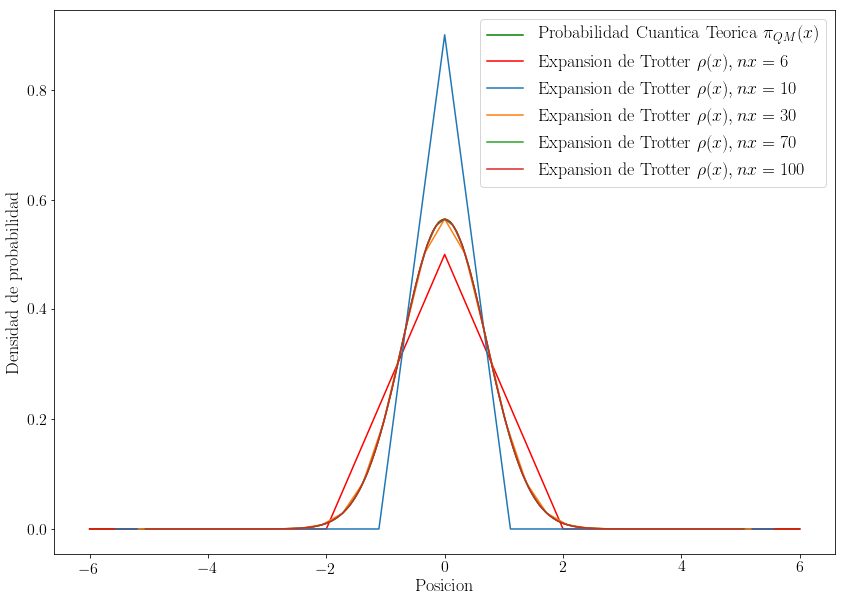

In [47]:



# nx=6

x_max=5.0
nx=6
dx=2.0*x_max/(nx-1)
x1= [i*dx for i in range(-(nx-1)/2,nx/2+1)]


beta_tmp=2.0**(-4)
beta=2.0**5
rho_1=rho_harmonic_trotter(x1,beta_tmp)
while beta_tmp < beta:
    rho_1= np.dot(rho_1,rho_1)
    rho_1*=dx
    beta_tmp *=2.0
   
    
z=np.sum(rho_1[i,i] for i in range(0,nx+1))*dx
pi_of_x_1=[rho_1[j,j]/z for j in range(0,nx+1)]

# nx=10

x_max=5.0
nx=10
dx=2.0*x_max/(nx-1)
x2= [i*dx for i in range(-(nx-1)/2,nx/2+1)]

beta_tmp=2.0**(-4)
beta=2.0**5
rho_2=rho_harmonic_trotter(x2,beta_tmp)
while beta_tmp < beta:
    rho_2= np.dot(rho_2,rho_2)
    rho_2*=dx
    beta_tmp *=2.0
   
    
z=np.sum(rho_2[i,i] for i in range(0,nx+1))*dx
pi_of_x_2=[rho_2[j,j]/z for j in range(0,nx+1)]


# nx=30

x_max=5.0
nx=30
dx=2.0*x_max/(nx-1)
x3= [i*dx for i in range(-(nx-1)/2,nx/2+1)]

beta_tmp=2.0**(-4)
beta=2.0**5
rho_3=rho_harmonic_trotter(x3,beta_tmp)
while beta_tmp < beta:
    rho_3= np.dot(rho_3,rho_3)
    rho_3*=dx
    beta_tmp *=2.0
    
    
z=np.sum(rho_3[i,i] for i in range(0,nx+1))*dx
pi_of_x_3=[rho_3[j,j]/z for j in range(0,nx+1)]

# nx=70

x_max=5.0
nx=70
dx=2.0*x_max/(nx-1)
x4= [i*dx for i in range(-(nx-1)/2,nx/2+1)]

beta_tmp=2.0**(-4)
beta=2.0**5
rho_4=rho_harmonic_trotter(x4,beta_tmp)
while beta_tmp < beta:
    rho_4= np.dot(rho_4,rho_4)
    rho_4*=dx
    beta_tmp *=2.0
  
    
z=np.sum(rho_4[i,i] for i in range(0,nx+1))*dx
pi_of_x_4=[rho_4[j,j]/z for j in range(0,nx+1)]


# nx=100

x_max=5.0
nx=100
dx=2.0*x_max/(nx-1)
x5= [i*dx for i in range(-(nx-1)/2,nx/2+1)]

beta_tmp=2.0**(-4)
beta=2.0**5
rho_5=rho_harmonic_trotter(x5,beta_tmp)
while beta_tmp < beta:
    rho_5= np.dot(rho_5,rho_5)
    rho_5*=dx
    beta_tmp *=2.0

    
z=np.sum(rho_5[i,i] for i in range(0,nx+1))*dx
pi_of_x_5=[rho_5[j,j]/z for j in range(0,nx+1)]

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
matplotlib.rcParams['figure.figsize'] = [14, 10]
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16)
plt.xlabel("Posicion",fontsize=18)
plt.ylabel("Densidad de probabilidad",fontsize=18)
plt.plot(piquan(16)[0],piquan(16)[1],"g",label=r"Probabilidad Cuantica Teorica $\pi_{QM}(x)$")
plt.plot(x1,pi_of_x_1,"r",label=r"Expansion de Trotter $\rho(x),nx=6$")
plt.plot(x2,pi_of_x_2,label=r"Expansion de Trotter $\rho(x),nx=10$")
plt.plot(x3,pi_of_x_3,label=r"Expansion de Trotter $\rho(x),nx=30$")
plt.plot(x4,pi_of_x_4,label=r"Expansion de Trotter $\rho(x),nx=70$")
plt.plot(x5,pi_of_x_5,label=r"Expansion de Trotter $\rho(x),nx=100$")
plt.legend(fontsize=18)

En este caso podemos ver como al reducir la cantidad de puntos intermedios la expansión de Trotter es más imprecisa, como es de esperar.

# Path Integral Monte Carlo

In [135]:
def rho_free(x,y,beta):
    return np.exp(-(x-y)**2/(2.0*beta))
beta=4.0
N=8
dtau=beta/N
delta=1.0
n_steps=1000000
x=[0.0,0,0,0,0,0,0,0]
x_0=[]
x_1=[]
x_2=[]
x_3=[]
x_4=[]
x_5=[]
x_6=[]
for step in range(n_steps):
    k=random.randint(0,N-1)
    knext,kprev=(k+1),(k-1)
    if knext==8:
        knext=0
        
    x_new=x[k]+random.uniform(-delta,delta)
    old_weight=(rho_free(x[knext],x[k],dtau)*rho_free(x[k],x[kprev],dtau)*np.exp(-0.5*dtau*x[k]**2))
    new_weight=(rho_free(x[knext],x_new,dtau)*rho_free(x_new,x[kprev],dtau)*np.exp(-0.5*dtau*x_new**2))
    if random.uniform(0.0,1.0)<new_weight/old_weight:
        x[k]=x_new
    if step%10==0:
        x_0.append(x[0])
        x_1.append(x[1])
        x_2.append(x[2])
        x_3.append(x[3])
        x_4.append(x[4])
        x_5.append(x[5])
        x_6.append(x[6])


In [136]:
# IMPORTANDO LOS DATOS DE MATRIX SQUARING PARA GRAFICAR
def read_file(filename):
    list_x=[]
    list_y=[]
    with open(filename) as f:
        for line in f:
            x,y=line.split()
            list_x.append(float(x))
            list_y.append(float(y))
    f.close()
    return list_x,list_y



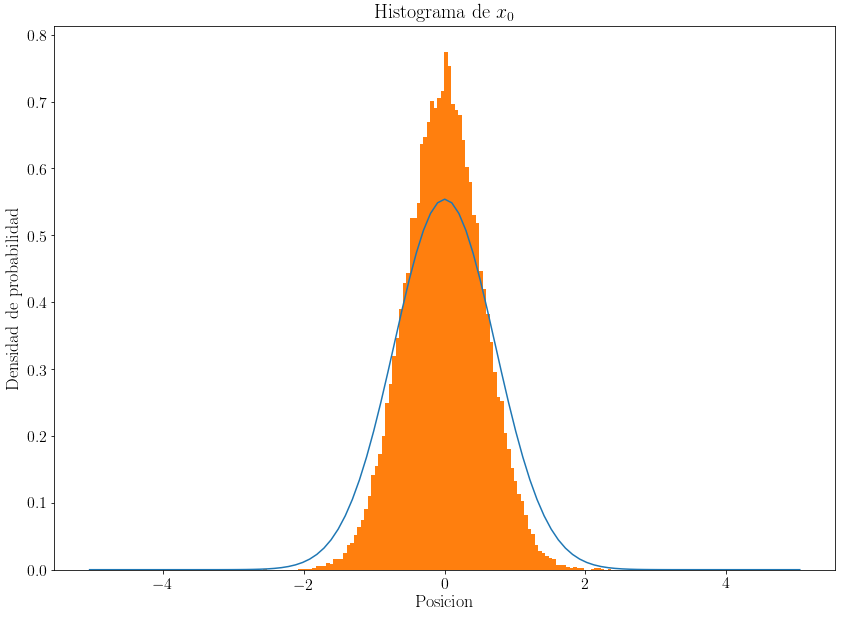

In [137]:
plt.plot(read_file("data_harm_matrixsquaring_beta4.0.dat")[0],read_file("data_harm_matrixsquaring_beta4.0.dat")[1])
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
matplotlib.rcParams['figure.figsize'] = [14, 10]
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16)
plt.xlabel("Posicion",fontsize=18)
plt.ylabel("Densidad de probabilidad",fontsize=18)
plt.hist(x_0,bins=100,normed=True,label="Histograma Path Integral")
plt.title("Histograma de $x_0$",fontsize=20)

## Gráfica del camino aleatorio x vs $\beta$

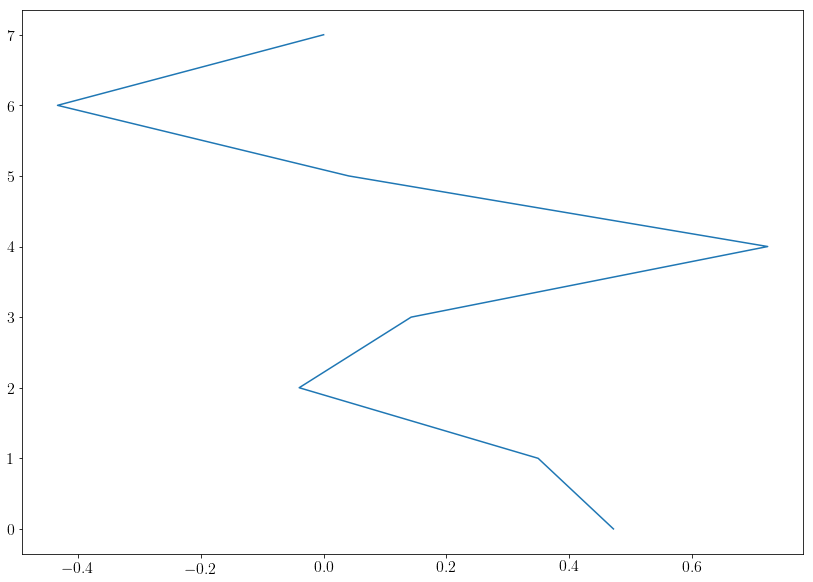

In [109]:
plt.plot(x,[0,1,2,3,4,5,6,7])

## Comparación entre $x_0$ y un $x_k$ arbitrario

In [139]:
def rho_free(x,y,beta):
    return np.exp(-(x-y)**2/(2.0*beta))
beta=4.0
N=10
dtau=beta/N
delta=1.0
n_steps=1000000
x=[0.0,0,0,0,0,0,0,0,0,0]
x_0=[]
x_1=[]
x_2=[]
x_3=[]
x_4=[]
x_5=[]
x_6=[]
x_7=[]
x_8=[]
for step in range(n_steps):
    k=random.randint(0,N-1)
    knext,kprev=(k+1),(k-1)
    if knext==8:
        knext=0
        
    x_new=x[k]+random.uniform(-delta,delta)
    old_weight=(rho_free(x[knext],x[k],dtau)*rho_free(x[k],x[kprev],dtau)*np.exp(-0.5*dtau*x[k]**2))
    new_weight=(rho_free(x[knext],x_new,dtau)*rho_free(x_new,x[kprev],dtau)*np.exp(-0.5*dtau*x_new**2))
    if random.uniform(0.0,1.0)<new_weight/old_weight:
        x[k]=x_new
    if step%10==0:
        x_0.append(x[0])
        x_1.append(x[1])
        x_2.append(x[2])
        x_3.append(x[3])
        x_4.append(x[4])
        x_5.append(x[5])
        x_6.append(x[6])
        x_7.append(x[7])
        x_8.append(x[8])

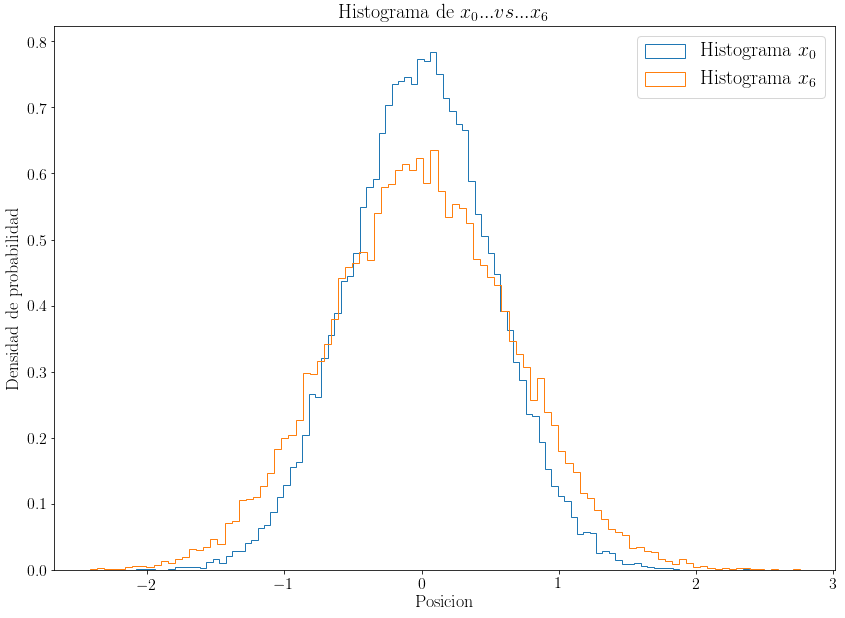

In [151]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
matplotlib.rcParams['figure.figsize'] = [14, 10]
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16)
plt.xlabel("Posicion",fontsize=18)
plt.ylabel("Densidad de probabilidad",fontsize=18)
plt.hist(x_0,bins=100,normed=True,histtype="step",label="Histograma $x_0$ ")
plt.hist(x_6,bins=100,normed=True,histtype="step",label="Histograma $x_6$")
plt.title("Histograma de $x_0...vs...x_6$",fontsize=20)
plt.legend(fontsize=20)

## Histograma con todo el conjunto $x={x_0,...,x_{[N-1]}}$

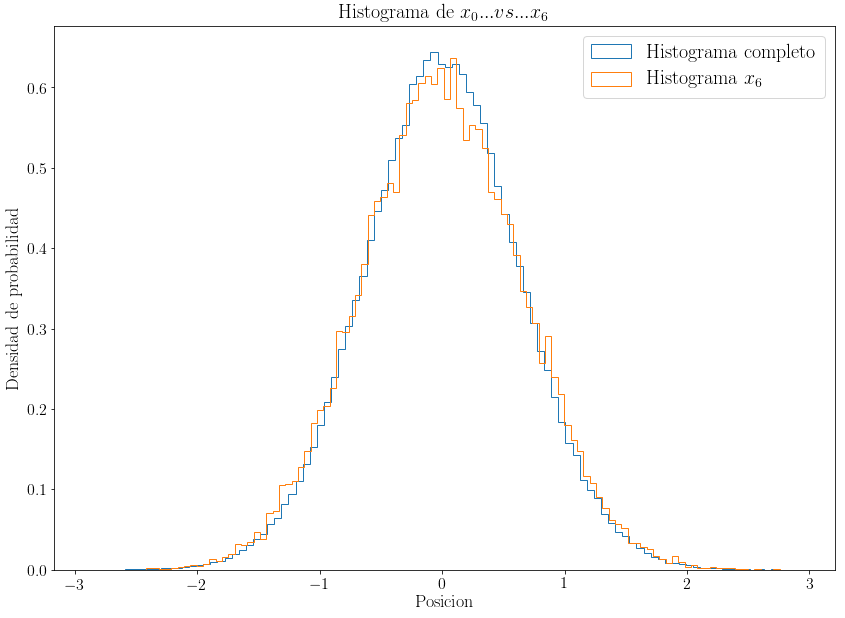

In [156]:
# DEFINICION DE X

x_complete=x_0+x_1+x_2+x_3+x_4+x_5+x_6+x_7+x_8

    
# GRAFICACION

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
matplotlib.rcParams['figure.figsize'] = [14, 10]
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16)
plt.xlabel("Posicion",fontsize=18)
plt.ylabel("Densidad de probabilidad",fontsize=18)
plt.hist(x_complete,bins=100,normed=True,histtype="step",label="Histograma completo")
plt.hist(x_6,bins=100,normed=True,histtype="step",label="Histograma $x_6$")
plt.title("Histograma de $x_0...vs...x_6$",fontsize=20)
plt.legend(fontsize=20)